<a href="https://colab.research.google.com/github/AnishaA-git/Heart_Disease/blob/master/Heart_Disease_with_githublink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clustering Graphs for Heart Disease** 

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import tensorflow as tf
from past.builtins import xrange
from itertools import cycle, islice
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

%matplotlib inline

## Creating a Pandas DataFrame from a CSV file

In [ ]:
filename = "https://raw.githubusercontent.com/AnishaA-git/Heart_Disease/master/heart.csv"
df = pd.read_csv(filename, sep=',', nrows=304)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Wrangling

In [ ]:
df = df.rename(columns={"age": "Age", "cp": "ChestPain", "trestbps": "Resting Blood Pressure",
                   "chol": "Cholesterol", "thalach": "Max Heart Beats", "oldpeak": "ST Depression"})
df

,Age,sex,ChestPain,Resting Blood Pressure,Cholesterol,fbs,restecg,Max Heart Beats,exang,ST Depression,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Sampling and Data Decscription

In [ ]:
df.shape

(303, 14)

In [ ]:
df.head()

,Age,sex,ChestPain,Resting Blood Pressure,Cholesterol,fbs,restecg,Max Heart Beats,exang,ST Depression,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
ChestPain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Resting Blood Pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Max Heart Beats,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
ST Depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Data Columns

In [ ]:
df.columns

Index(['Age', 'sex', 'ChestPain', 'Resting Blood Pressure', 'Cholesterol',
       'fbs', 'restecg', 'Max Heart Beats', 'exang', 'ST Depression', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')

## Business Logic

With the dataset of Heart Disease where we have a total of 14 columns, each column is a feature data which directly helps in predicting the heart disease existence. Considering the "target" column as the prediction result, I have used unsupervised clustering of K-Means to figure out different clusters of 2 different columns. 
Such as:


*   Age : Cholesterol
*   Age : Resting Blood Pressure
*   Age : Max Heart Beats
*   Age : ST Depression


## Elbow Method for calculating Clusters

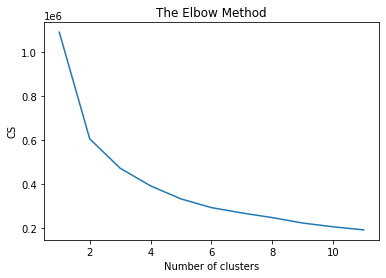

In [ ]:
cs = []
for i in range(1, 12):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  model = kmeans.fit(df)
  #print("model\n", model)
  cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## Code Snippet for Scikit Clustering

In [ ]:
def k_means_clustering_scikit(col1,col2):
  best_cols=[col1.name,col2.name]
  kmeans = KMeans(n_clusters=6, init ="k-means++", n_init=10, max_iter=300)
  best_vals = df[best_cols].iloc[ :, [0,1]].values
  y_pred = kmeans.fit_predict(best_vals)

  df["cluster"] = y_pred
  kmeans.cluster_centers_

  best_cols.append("cluster")
  sns.lmplot(data=df, x=col1.name, y=col2.name, hue='cluster', fit_reg=False, legend=True, legend_out=True)
  plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')

## Code Snippet for TensorFlow Clustering

In [ ]:
def calculate_data_points(df_col_1, df_col_2, clusters):
  vec_vals = []
  for i in range(len(df_col_1)):
      a = df_col_1[i]
      b = df_col_2[i]
      vec_vals.append([a, b])
  v_vals = np.array(vec_vals)
  np.random.shuffle(v_vals)    
  tf.compat.v1.disable_eager_execution()
  sess = tf.compat.v1.Session()
  k = clusters
  points = v_vals
  return points

def k_means_clustering_tensorflow(df_col_1, df_col_2, clusters, steps=100):
    '''
    Takes in two dataframe columns and outputs plot of clusters.
    '''
    points = calculate_data_points(df_col_1, df_col_2, clusters)
    def input_fn():
      return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

    num_clusters = 6
    kmeans = tf.compat.v1.estimator.experimental.KMeans(
        num_clusters=num_clusters, use_mini_batch=False)

    # train
    num_iterations = 10
    previous_centers = None
    for _ in xrange(num_iterations):
      kmeans.train(input_fn)
      cluster_centers = kmeans.cluster_centers()
      #if previous_centers is not None:
        #print('delta:', cluster_centers - previous_centers)
      previous_centers = cluster_centers
      #print('score:', kmeans.score(input_fn))
    #print('cluster centers:', cluster_centers)

    # map the input points to their clusters
    cluster_indices = list(kmeans.predict_cluster_index(input_fn))
    for i, point in enumerate(points):
      cluster_index = cluster_indices[i]
      center = cluster_centers[cluster_index]
      #print('point:', point, 'is in cluster', cluster_index, 'centered at', center)
            
    clusters_df = pd.DataFrame({df_col_1.name: points[:,0], df_col_2.name: points[:,1], "cluster": cluster_indices})
    sns.lmplot(df_col_1.name, df_col_2.name, data=clusters_df, fit_reg=False, height=6, hue="cluster")
    plt.scatter(cluster_centers[:,0],cluster_centers[:,1],color='black',marker='*',label='centroid')
    plt.show()
    

## Scatter Plot for Age and Cholesterol

Text(0, 0.5, 'Cholesterol')

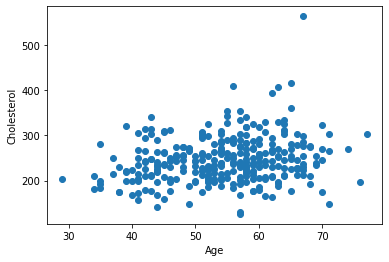

In [ ]:
plt.scatter(df['Age'],df['Cholesterol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')

## Clustering with reference to Age and Cholesterol level (SciKit)

Business Logic: With Reference to Age what is the Cholesterol level analysis.

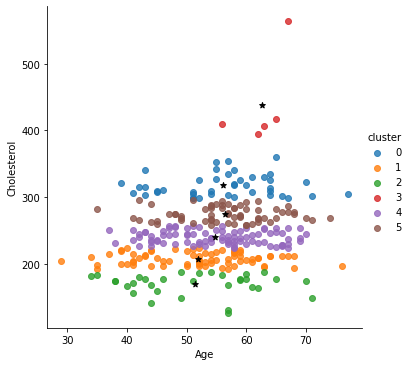

In [ ]:
k_means_clustering_scikit(df['Age'], df['Cholesterol'])

## Clustering with reference to Age and Cholesterol level (TensorFlow)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2lmdynvn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


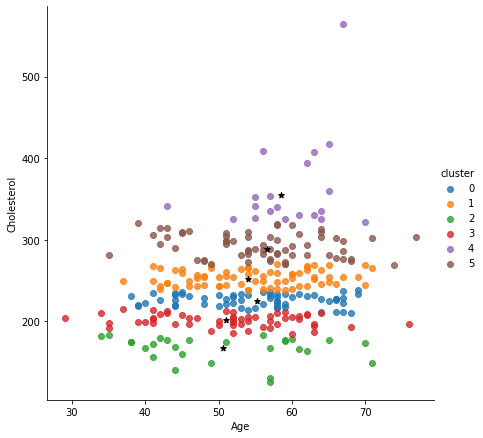

In [ ]:
k_means_clustering_tensorflow(df['Age'], df['Cholesterol'], 6)

## Scatter Plot for Age and Resting Blood Pressure

Text(0, 0.5, 'Resting Blood Pressure')

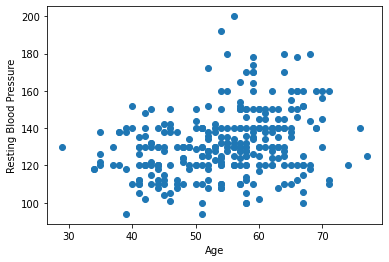

In [ ]:
plt.scatter(df['Age'],df['Resting Blood Pressure'])
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')

## Clustering with reference to Age and Resting Blood Pressure (SciKit)


Business Logic: With Reference to Age what are the readings of Blood Pressure during the resting mode.

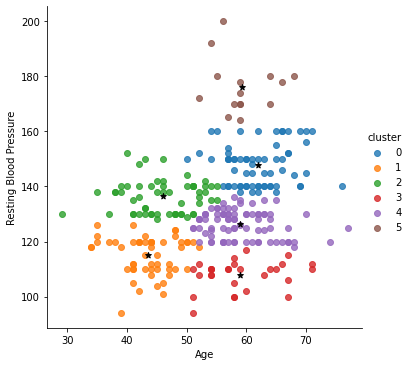

In [ ]:
k_means_clustering_scikit(df['Age'], df['Resting Blood Pressure'])

## Clustering with reference to Age and Resting Blood Pressure (TensorFlow)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpw9e0d8gi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


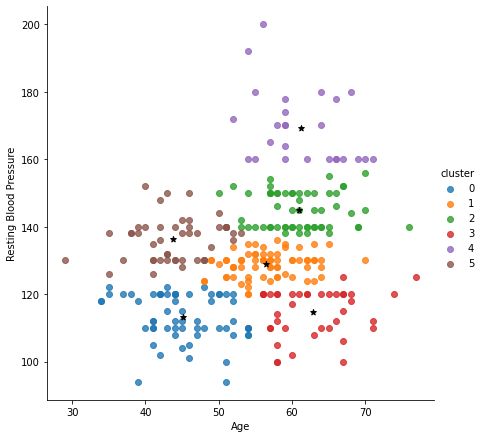

In [ ]:
k_means_clustering_tensorflow(df['Age'], df['Resting Blood Pressure'], 6)

## Scatter Plot for Age and Max Heart Beats

Text(0, 0.5, 'Max Heart Beats')

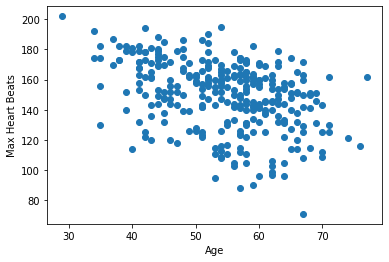

In [ ]:
plt.scatter(df['Age'],df['Max Heart Beats'])
plt.xlabel('Age')
plt.ylabel('Max Heart Beats')

## Clustering with reference to Age and Maximum Heart Beats (SciKit)


Business Logic: With Reference to Age what are the readings of Maximum Heart Beats.

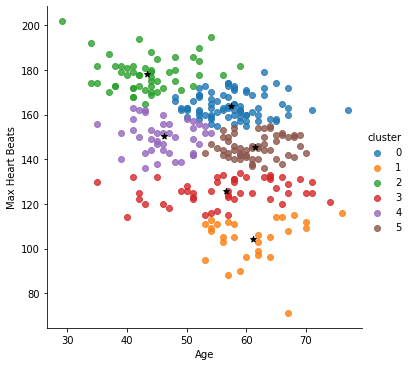

In [ ]:
k_means_clustering_scikit(df['Age'], df['Max Heart Beats'])

## Clustering with reference to Age and Maximum Heart Beats (TensorFlow)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmprj6w26lf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


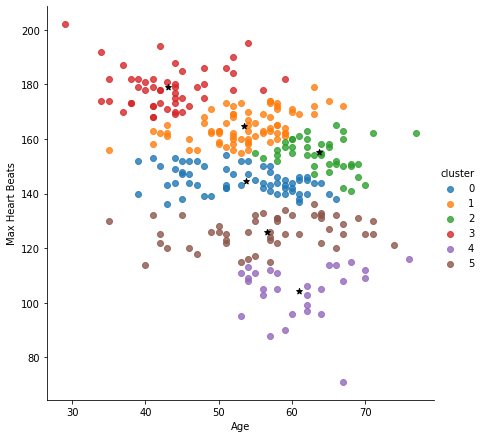

In [ ]:
k_means_clustering_tensorflow(df['Age'], df['Max Heart Beats'], 6)

## Scatter Plot for Age and ST Depression

Text(0, 0.5, 'ST Depression')

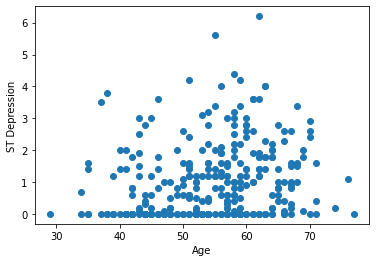

In [ ]:
plt.scatter(df['Age'],df['ST Depression'])
plt.xlabel('Age')
plt.ylabel('ST Depression')

## Clustering with reference to Age and ST Depression (SciKit)


Business Logic: With Reference to Age what is the ST Depression analysis.

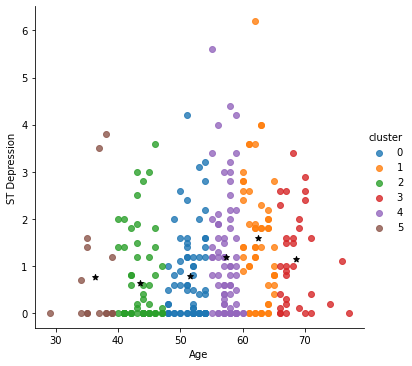

In [298]:
k_means_clustering_scikit(df['Age'], df['ST Depression'])

## Clustering with reference to Age and ST Depression (TensorFlow)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp95ymd6eo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


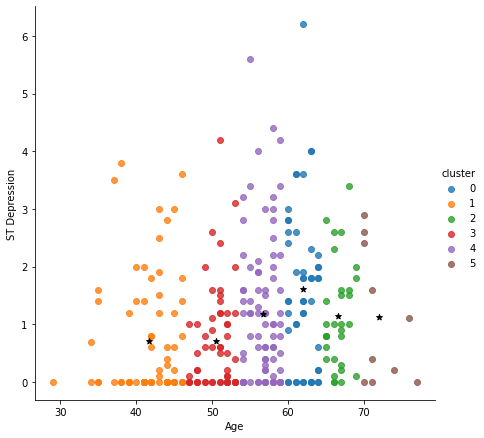

In [ ]:
k_means_clustering_tensorflow(df['Age'], df['ST Depression'], 6)

## Parallel Plotting 

In [286]:
X = StandardScaler().fit_transform(df)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.14887271,
         0.91452919,  1.15407155],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.51292188,
         0.91452919,  1.79687244],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.51292188,
         0.91452919, -0.13153021],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.12302895,
        -1.09345881, -0.7743311 ],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  1.12302895,
        -1.09345881,  0.51127067],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.51292188,
        -1.09345881,  0.51127067]])

In [292]:
kmeans = KMeans(n_clusters=6)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [293]:
centers = model.cluster_centers_
centers

array([[-1.02501033,  0.24489047,  0.38367826, -0.3816132 , -0.35380136,
        -0.41763453,  0.40205943,  0.82223891, -0.44942919, -0.57053774,
         0.59943263, -0.44470843, -0.46550301,  0.88542791, -0.0104228 ],
       [ 0.22883165,  0.3965228 , -0.86715097, -0.06502123,  0.02388579,
        -0.16951049, -0.10945817, -0.99035883,  1.27870821,  0.67121432,
        -0.62520933,  0.23627306,  0.52157644, -0.97534187,  0.1331525 ],
       [ 0.84584666, -0.31694105, -0.45324171,  0.97608941,  0.41315622,
         0.38581476, -0.12146318, -0.74203203, -0.08745578,  1.16436445,
        -0.88132257,  1.52445359,  0.12977309, -0.80660338,  0.53422784],
       [-0.00731619,  0.68100522,  0.18731855, -0.08588424, -0.17787225,
        -0.41763453, -0.16772246,  0.35304228, -0.35549268, -0.15149276,
         0.22863807, -0.08754178,  0.66496272, -0.65170145,  0.0998781 ],
       [ 0.28334823,  0.1956517 ,  0.75211362,  0.20756555, -0.03377896,
         2.394438  , -0.0841573 ,  0.27641515, 

In [294]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(df, centers):
	colNames = list(df)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [295]:
# Function that creates Parallel Plots

def parallel_plot(df):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(df, 'prediction', color = my_colors, marker='o')

In [296]:
P = pd_centers(df, centers)
P

,Age,sex,ChestPain,Resting Blood Pressure,Cholesterol,fbs,restecg,Max Heart Beats,exang,ST Depression,slope,ca,thal,target,cluster,prediction
0,-1.025010,0.244890,0.383678,-0.381613,-0.353801,-0.417635,0.402059,0.822239,-0.449429,-0.570538,0.599433,-0.444708,-0.465503,0.885428,-0.010423,0
1,0.228832,0.396523,-0.867151,-0.065021,0.023886,-0.169510,-0.109458,-0.990359,1.278708,0.671214,-0.625209,0.236273,0.521576,-0.975342,0.133153,1
2,0.845847,-0.316941,-0.453242,0.976089,0.413156,0.385815,-0.121463,-0.742032,-0.087456,1.164364,-0.881323,1.524454,0.129773,-0.806603,0.534228,2
3,-0.007316,0.681005,0.187319,-0.085884,-0.177872,-0.417635,-0.167722,0.353042,-0.355493,-0.151493,0.228638,-0.087542,0.664963,-0.651701,0.099878,3
4,0.283348,0.195652,0.752114,0.207566,-0.033779,2.394438,-0.084157,0.276415,-0.283964,-0.334718,0.137402,-0.019292,-0.301831,0.396339,-0.318150,4
5,0.404622,-1.317581,0.219330,0.022490,0.371236,-0.417635,-0.103561,0.090629,-0.472198,-0.367136,0.177878,-0.405110,-0.541623,0.844073,-0.323243,5


## Heart Disease: True

Business Logic: If the target value is greater than zero then the Heart disease occur, else it won't

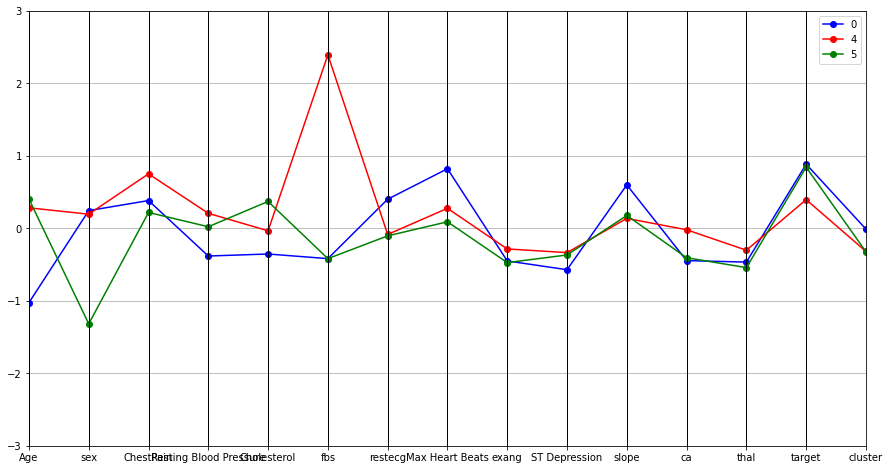

In [297]:
parallel_plot(P[P['target'] > 0])

## Heart Disease: False

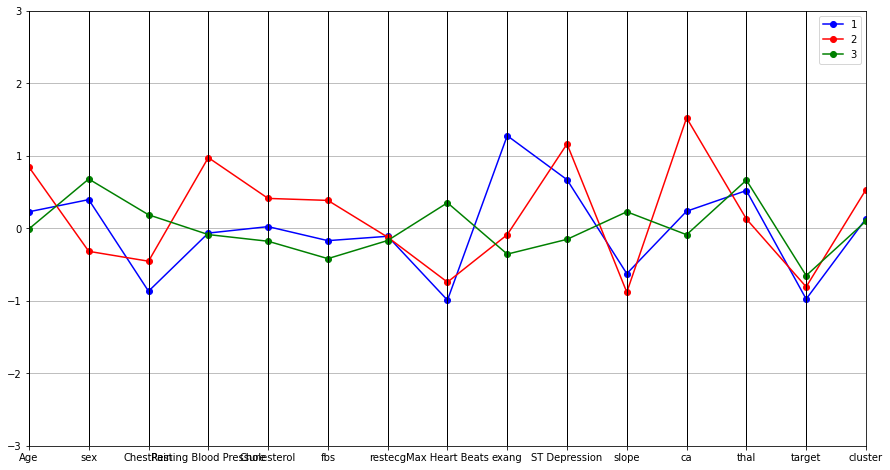

In [299]:
parallel_plot(P[P['target'] < 0])